## Data Information

The data for the case is in CSV format with 6,362,620 rows and 10 columns originally.

- **step** - a unit of time in the real world. In this case 1 step is 1 hour of time.

- **type** - type of transaction: CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

- **amount** - amount of the transaction.

- **nameOrig** - initiator of the transaction

- **oldbalanceOrg** - balance before the transaction

- **newbalanceOrig** - balance after the transaction

- **nameDest** - recipient of the transaction

- **oldbalanceDest** - initial balance of recipient before the transaction.

- **newbalanceDest** - new balance of recipient after the transaction

- **isFraud** - the transactions made by the fraudulent agents inside the simulation.

- **isFlaggedFraud** - the transacton that is flagged for illegal attempts which invole more than 200,000 in a single transaction.

## Dataset Preparation

### Load the data

Import libraries

In [1]:
import uuid
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import dataset 

In [2]:
df = pd.read_csv('Fraud.csv')

View columns of dataset and check the data type for each column

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Preview the dataset

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## Data Exploration and Analysis

### Preview and analyze the data

Check for missing values in dataset

In [5]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Filter unnecessary column and standardize the naming

In [6]:
df.rename(columns={'oldbalanceOrg': 'oldbalanceOrig'}, inplace=True)
df.drop('isFlaggedFraud', axis=1, inplace=True)

View the statistical summary of numerical variables

In [7]:
df.describe()

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [8]:
df[['amount', 'oldbalanceOrig', 'newbalanceOrig', 'oldbalanceDest', 'isFraud']].agg(['min', 'max'])

,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,isFraud
min,0.00,0.00,0.00,0.000000e+00,0
max,92445516.64,59585040.37,49585040.37,3.560159e+08,1


### Visualize the transaction data

Compare the frequencies of each type of transaction with/without regard to the variable **isFraud**

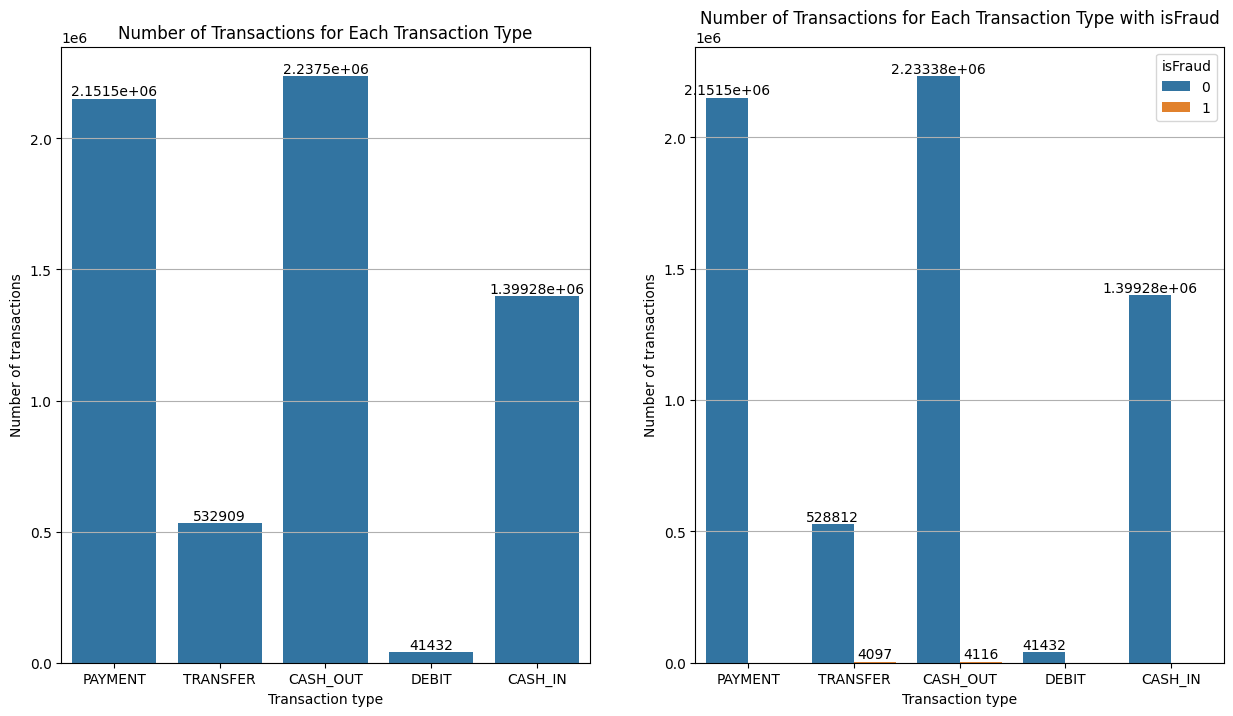

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))

sns.countplot(x='type', data=df, ax=ax[0])
for count in ax[0].containers:
    ax[0].bar_label(count)
ax[0].set_title('Number of Transactions for Each Transaction Type')
ax[0].set_xlabel('Transaction type')
ax[0].set_ylabel('Number of transactions')
ax[0].grid(axis='y')

sns.countplot(x='type', data=df, hue='isFraud', ax=ax[1])
for count in ax[1].containers:
    ax[1].bar_label(count)
ax[1].set_title('Number of Transactions for Each Transaction Type with isFraud')
ax[1].set_xlabel('Transaction type')
ax[1].set_ylabel('Number of transactions')
ax[1].grid(axis='y')

Count the proportion of fraudulent activities for the transaction types of **TRANSFER** and **CASH_OUT**

In [10]:
fraud_portion = df.loc[df['type'].isin(["TRANSFER", "CASH_OUT"])].drop(['step', 'nameOrig', 'nameDest'], axis=1)
pd.crosstab(index=fraud_portion['type'], columns=fraud_portion['isFraud'], margins=True)

isFraud,0,1,All
type,,,
CASH_OUT,2233384,4116,2237500
TRANSFER,528812,4097,532909
All,2762196,8213,2770409


Check the top 10 maximum amounts of transactions:

In [11]:
df.nlargest(10, ['amount'])

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
3686583,276,TRANSFER,92445516.64,C1715283297,0.0,0.0,C439737079,9.595980e+03,9.245511e+07,0
4060598,300,TRANSFER,73823490.36,C2127282686,0.0,0.0,C753026640,9.362401e+07,1.674475e+08,0
4146397,303,TRANSFER,71172480.42,C2044643633,0.0,0.0,C84111522,1.134615e+08,1.846340e+08,0
3946920,286,TRANSFER,69886731.30,C1425667947,0.0,0.0,C167875008,1.515387e+08,2.214254e+08,0
3911956,284,TRANSFER,69337316.27,C1584456031,0.0,0.0,C1472140329,1.130072e+08,1.823446e+08,0
3937152,286,TRANSFER,67500761.29,C811810230,0.0,0.0,C1757599079,8.635615e+07,1.538569e+08,0
4105338,302,TRANSFER,66761272.21,C420748282,0.0,0.0,C1073241084,6.874206e+07,1.355033e+08,0
3892529,284,TRANSFER,64234448.19,C1139847449,0.0,0.0,C65111466,6.597691e+07,1.663021e+08,0
3991638,298,TRANSFER,63847992.58,C300140823,0.0,0.0,C514940761,7.217149e+07,1.360195e+08,0
4143801,303,TRANSFER,63294839.63,C372535854,0.0,0.0,C1871605747,7.512528e+07,1.384201e+08,0


## Unsupervised Data Modeling

### Prepare the data for unsupervised modeling

Add new features to the data, filter unnecessary transaction types, and select a subset of the non-fraud transactions with undersampling

In [12]:
seed = 100

fraud_isFraud = fraud_portion[fraud_portion.isFraud == 1]
fraud_not_isFraud = fraud_portion[fraud_portion.isFraud == 0].sample(frac=10/100, random_state=seed)
fraud_data_sample = pd.concat([fraud_isFraud, fraud_not_isFraud])
fraud_data_sample['origzeroFlag'] = np.where(fraud_data_sample['oldbalanceOrig']==0.0, 1, 0)
fraud_data_sample['destzeroFlag'] = np.where(fraud_data_sample['newbalanceDest']==0.0, 1, 0)
fraud_data_sample['amountError'] = round((df['newbalanceDest']-df['oldbalanceDest']-df['amount']))
fraud_data_sample['id'] = [uuid.uuid4() for _ in range(len(fraud_data_sample.index))]
fraud_data_sample.head()

,type,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,origzeroFlag,destzeroFlag,amountError,id
2,TRANSFER,181.0,181.0,0.0,0.0,0.0,1,0,1,-181.0,1762cb7e-d4ad-41fa-999a-dabc32a6b673
3,CASH_OUT,181.0,181.0,0.0,21182.0,0.0,1,0,1,-21363.0,c209e781-22aa-4bc3-9f4d-fbbcb190094f
251,TRANSFER,2806.0,2806.0,0.0,0.0,0.0,1,0,1,-2806.0,a30ead8c-209e-45e4-bfed-72b16cf34a45
252,CASH_OUT,2806.0,2806.0,0.0,26202.0,0.0,1,0,1,-29008.0,a7ca877d-3d0b-4460-8320-92739050da9d
680,TRANSFER,20128.0,20128.0,0.0,0.0,0.0,1,0,1,-20128.0,947f4032-a1ee-4290-84f9-8324aed28586


Create a test dataframe, **fraud_data_test**, by selecting a random sample of 20%:

In [13]:
fraud_data_test = fraud_data_sample.sample(frac=20/100, random_state=seed)

In [14]:
fraud_data_model = fraud_data_sample[~fraud_data_sample.isin(fraud_data_test.drop_duplicates()).all(axis=1)].copy()
fraud_data_model.sample(10)

,type,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,origzeroFlag,destzeroFlag,amountError,id
5438175,CASH_OUT,22562.51,25337.00,2774.49,118253.23,140815.74,0,0,0,-0.0,73c10e1c-c350-448a-8713-43c2806704c7
3131895,CASH_OUT,228157.17,0.00,0.00,1039476.37,1801061.06,0,1,0,533428.0,890dd150-4a79-483a-9129-23c5a6e11b66
4019984,CASH_OUT,53325.58,22490.00,0.00,5795.76,59121.35,0,0,0,0.0,6046cef1-0c08-4518-ae95-b7c482b12053
6353675,TRANSFER,3049753.79,3049753.79,0.00,0.00,0.00,1,0,1,-3049754.0,1a714f1f-b70b-4295-bdb9-5d4bc98983ba
5432077,CASH_OUT,250943.20,28860.00,0.00,117216.72,368159.92,0,0,0,-0.0,9e990295-5583-4d29-901f-f45446cfd689
5959774,CASH_OUT,389376.55,16786.04,0.00,7513639.46,7903016.01,0,0,0,-0.0,2710b885-be9e-4ded-be33-549512529d4a
1417479,CASH_OUT,451058.64,0.00,0.00,718601.53,983019.00,0,1,0,-186641.0,09b19f20-8b06-424d-a924-ffe11193cb80
580996,CASH_OUT,297286.34,0.00,0.00,11669623.76,11966910.09,0,1,0,-0.0,faee6a61-3dc0-4860-8ed6-06ebf7081a69
1655577,CASH_OUT,160412.88,0.00,0.00,628957.50,789370.39,0,1,0,0.0,20fc1f7b-9bf2-4a5a-8e16-9ce9efefe065
1726026,CASH_OUT,161879.88,79883.00,0.00,1672872.62,1834752.50,0,0,0,-0.0,93b04ee9-94ae-40e2-b77c-05b1c6a7c518


### Train an unsupervised model to detect anomalies

Import libraries

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

Set up a dataframe, **X**, to apply k-means clustering algorithm

In [16]:
X = fraud_data_model.drop(['isFraud', 'id'], axis=1)
X['type'] = LabelEncoder().fit_transform(X['type'])

X.sample(10)

,type,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,origzeroFlag,destzeroFlag,amountError
2372782,0,32395.50,6054.00,0.0,0.00,32395.50,0,0,0.0
5855938,1,238074.12,0.00,0.0,5258837.64,5496911.76,1,0,0.0
3360446,0,38009.59,0.00,0.0,5226016.74,5264026.34,1,0,0.0
4156802,0,237585.56,5272.00,0.0,384846.77,622432.33,0,0,-0.0
5610864,1,1699388.72,0.00,0.0,3721425.12,5420813.84,1,0,-0.0
855704,0,69216.55,0.00,0.0,85016.50,154233.05,1,0,-0.0
789394,0,65150.15,0.00,0.0,171555.19,236705.35,1,0,0.0
2458931,0,204358.71,234.00,0.0,74553.74,278912.45,0,0,0.0
2831159,0,25945.50,0.00,0.0,1122805.20,1148750.70,1,0,0.0
33914,0,29707.86,29707.86,0.0,10935.00,0.00,0,1,-40643.0


In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227546 entries, 2 to 3221901
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   type            227546 non-null  int64  
 1   amount          227546 non-null  float64
 2   oldbalanceOrig  227546 non-null  float64
 3   newbalanceOrig  227546 non-null  float64
 4   oldbalanceDest  227546 non-null  float64
 5   newbalanceDest  227546 non-null  float64
 6   origzeroFlag    227546 non-null  int64  
 7   destzeroFlag    227546 non-null  int64  
 8   amountError     227546 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 17.4 MB


Find the likely values for k by plotting the Elbow Curve

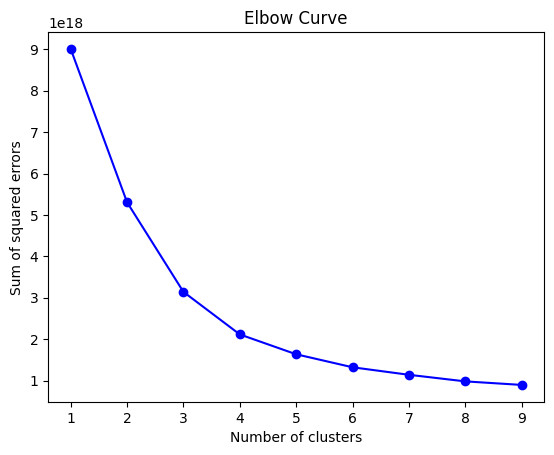

In [18]:
# Find the optimal number of clusters (k) using the elbow method
sse = [] # Sum of squared errors
k_range = range(1, 10)
for k in k_range:
    km = KMeans(n_clusters=k).fit(X)
    sse.append(km.inertia_)
 
# Plot the elbow curve
plt.plot(k_range, sse, '-bo')
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared errors')
plt.show()

In [19]:
# Choose k = 5
k = 5

# Train the k-means clustering model on the features (X)
kmeans = KMeans(n_clusters=k, random_state=seed)
kmeans.fit(X)
from sklearn.metrics import davies_bouldin_score
print(davies_bouldin_score(X, kmeans.labels_))

0.5979426928660148


Score the test data, **fraud_data_test**, using this model and see the number of fraud events in each **centroid_id**. The clustering algorithms create homogeneous groups of observations. In this query, **kmeans.predict** will call the model and generate the **centroid_id** for each transaction in the test data.

In [20]:
X_test = fraud_data_test.drop(['isFraud', 'id'], axis=1)
X_test['type'] = LabelEncoder().fit_transform(X_test['type'])

centroid_id_pred = kmeans.predict(X_test)
fraud_data_test_pred = fraud_data_test.copy()
fraud_data_test_pred['centroid_id_pred'] = centroid_id_pred
fraud_data_test_pred.groupby('centroid_id_pred').agg(fruad_cnt=('isFraud', 'sum'), total_cnt=('isFraud', 'count')).reset_index()

,centroid_id_pred,fruad_cnt,total_cnt
0,0,165,8780
1,1,1,286
2,2,22,2147
3,3,0,17
4,4,1451,45657


In [21]:
fraud_data_test_pred.head()

,type,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,origzeroFlag,destzeroFlag,amountError,id,centroid_id_pred
939941,TRANSFER,202883.68,0.0,0.0,7359131.30,7562014.98,0,1,0,0.0,4ba9e23e-08ad-407c-a6b1-57ea2e634d63,0
1982565,CASH_OUT,191328.31,0.0,0.0,509280.72,439036.61,0,1,0,-261572.0,9437b7c1-853f-4bfd-bd11-15df44dc0dfa,4
5707542,CASH_OUT,98652.34,0.0,0.0,3767083.99,3865736.33,0,1,0,-0.0,e703865b-ad66-41ed-8197-481003a86e82,0
1121172,CASH_OUT,285909.27,154242.0,0.0,81254.66,367163.93,0,0,0,0.0,ff82d1ae-3cd5-4847-bc6d-ed0f28486cdb,4
1841993,CASH_OUT,91658.39,0.0,0.0,3731741.88,3823400.27,0,1,0,0.0,7c235efc-2727-479d-bc66-bb9e2d3889d4,0


## Supervised Data Modeling

### Train supervised models using Logistic Regression and Gradient Boosted Tree

Import libraries

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

Prepare and filter the data for modeling

In [23]:
X = fraud_data_sample.copy()
X['type'] = LabelEncoder().fit_transform(X['type'])
y = X.pop('isFraud')

explanatory_vairables = ['type', 'amount', 'oldbalanceOrig', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
aggregate_scores = ['precision', 'recall', 'accuracy', 'f1', 'roc_auc']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20/100, random_state=seed)

Train the logistic regression model

In [24]:
# Create and fit the Logistic Regression model
logistic_regression_model = LogisticRegression(max_iter=1000, random_state=seed)
logistic_regression_model.fit(X_train[explanatory_vairables], y_train)

for score in aggregate_scores:
    scores = cross_val_score(logistic_regression_model, X[explanatory_vairables], y, scoring=score, n_jobs=-1)
    print('Mean {} score: {:.3f} ({:.3f})'.format(score, scores.mean(), scores.std()))

Mean precision score: 0.920 (0.010)
Mean recall score: 0.585 (0.019)
Mean accuracy score: 0.987 (0.001)
Mean f1 score: 0.715 (0.017)
Mean roc_auc score: 0.980 (0.006)


Train the gradient boosted regression trees model

In [25]:
# Create and fit the Gradient Boosting Classifier model
boosted_tree_model = GradientBoostingClassifier(random_state=seed)
boosted_tree_model.fit(X_train[explanatory_vairables], y_train)

for score in aggregate_scores:
    scores = cross_val_score(boosted_tree_model, X[explanatory_vairables], y, scoring=score, n_jobs=-1)
    print('Mean {} score: {:.3f} ({:.3f})'.format(score, scores.mean(), scores.std()))

Mean precision score: 0.980 (0.002)
Mean recall score: 0.791 (0.014)
Mean accuracy score: 0.993 (0.000)
Mean f1 score: 0.875 (0.009)
Mean roc_auc score: 0.997 (0.004)


## Model Evaluation and Selection

### Evaluate both unsupervised and supervied models

Initially, the k-means clustering is applied to identify anomalies - suspicious transactions that deviate from the norm. Then, by adding more variables and training a model, **logistic_regression_model**, using logistic regression, explainnatory variable **isFraud** could be estimated with good model F1 score,  accuracy, and precision. However, the boosted tree model, **boosted_tree_model**, performs comparably better based on the performance tables. Adding the new, additional features improved the model's accuracy.

### Predict and evaluate fraudulent transactions on test data with the selected model

Boosted tree model is selected to predict the variabel **isFraud** in the dataframe **X_test**

In [26]:
y_pred = boosted_tree_model.predict(X_test[explanatory_vairables])
predicted_probs = boosted_tree_model.predict_proba(X_test[explanatory_vairables])[:, 1]

# Create a DataFrame with predictions and actual values
results = pd.DataFrame({
    'id': X_test['id'],
    'predicted': y_pred,
    'actual': y_test,
    'prob': predicted_probs
})

# Filter results where predicted label is 1 and probability > 0.5
filtered_results = results[(results['predicted']==1) & (results['prob']>0.5)]

# Display the filtered results
print('Number of rows: {}'.format(filtered_results.shape[0]))
filtered_results.sample(20)

Number of rows: 1322


,id,predicted,actual,prob
6291215,ea7b610c-e623-4b1c-b732-05b98be2d77a,1,1,0.994748
5561948,a786c366-e29b-45df-a2d5-1e019e6a8ed0,1,1,0.996197
2852554,76500307-b223-4789-9928-6a6dd1348a94,1,1,0.996197
576022,d6280239-7fd8-4271-9001-5b9531d8c054,1,1,0.996739
3628554,672d6cd9-f21e-4e2f-90c1-90f251efcfc6,1,1,0.996197
4967646,a54ba5f3-16f2-475a-8b05-53e09ae511e0,1,1,0.996197
6276615,2bb7ab61-28eb-4b5e-87af-8c7d2adfbdcd,1,1,0.773363
6018857,450ad0fd-fb80-4c28-9437-5c118472ad97,1,1,0.996197
6273180,a83530de-9b2a-403c-bc03-0ccd4791a6c0,1,1,0.996197
1007889,8f11d65c-6f1f-4cb3-90cf-3a6a36a0e919,1,1,0.968288


In [27]:
# Build a text report showing the main classification metrics
target_names = ['Non-Fraud: isFraud = 0', 'Fraud: isFraud = 1']
print(classification_report(y_test, y_pred, target_names=target_names))

                        precision    recall  f1-score   support

Non-Fraud: isFraud = 0       0.99      1.00      1.00     55248
    Fraud: isFraud = 1       0.98      0.79      0.88      1639

              accuracy                           0.99     56887
             macro avg       0.99      0.90      0.94     56887
          weighted avg       0.99      0.99      0.99     56887



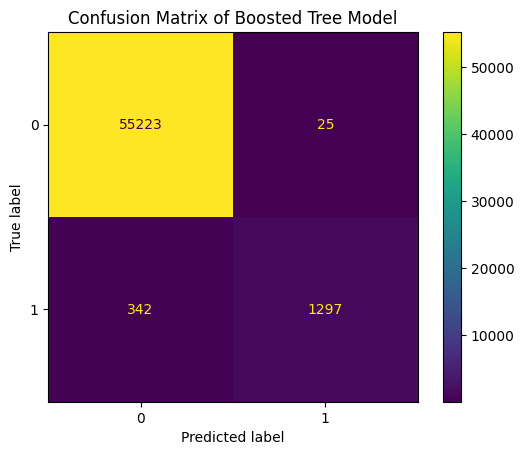

In [28]:
# Plot the Confusion Matrix to analyze cases: true positive, false positive, true negative, and false nagetive
cm = confusion_matrix(y_test, y_pred, labels=boosted_tree_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=boosted_tree_model.classes_)
disp.plot()
plt.title('Confusion Matrix of Boosted Tree Model')
plt.show()